# Resampling time-series 

<h3> Prepare data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('../expedia_data/train.csv')
test = pd.read_csv('../expedia_data/test.csv')

In [3]:
print('training data has %d records'%len(train))
print('test data has %d records'%len(test))

training data has 9917530 records
test data has 6622629 records


In [4]:
cols_train_only = [col for col in train.columns.unique().tolist() if col not in test.columns.unique().tolist()]
print('Columns only available in training data:',cols_train_only)

Columns only available in training data: ['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']


In [5]:
train = train.drop(columns = cols_train_only)
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [6]:
# combine train and test data
all_data = pd.concat([train, test], ignore_index=True)
all_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [7]:
print('Whole dataset has %d records' % len(all_data))

Whole dataset has 16540159 records


In [8]:
all_data['date_time'] = pd.to_datetime(all_data.date_time)
all_data.sort_values(by=['date_time'],inplace=True)

In [9]:
all_data = all_data.reset_index(drop=True)
all_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,24202,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,327,4,4.5,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,20797,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,53733,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,57269,4,4.5,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4> Plot the median price trend: 

df has: 652044 records
1304


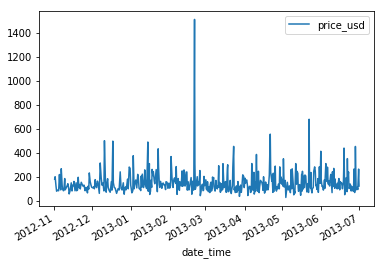

In [39]:
df = all_data[['date_time','price_usd']]
df = df.set_index('date_time')
df = df.groupby(level=0).median()
print('df has: %d records'%len(df))

# select intervals data to plot & see price trend
# select 500 data points (one in 1304 points)

interval_range = len(df)//500  
mid_idx_lst = []
for i in range(1,501):
    mid_idx = (1304*(i-1) + 1304*i)//2
    mid_idx_lst.append(mid_idx)

df_sampled = df.iloc[mid_idx_lst]
df_sampled.plot()

<h4> Resample data:

In [45]:
# all_data.info()

In [46]:
all_data_resetIndex = all_data.set_index('date_time')
all_data_resetIndex.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
date_time,,,,,,,,,,,,,,,,,,,,,
2012-11-01 00:01:37,365278,24,216,NaN,NaN,225,24202,3,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01 00:01:37,365278,24,216,NaN,NaN,225,327,4,4.5,0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01 00:01:37,365278,24,216,NaN,NaN,225,20797,3,3.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01 00:01:37,365278,24,216,NaN,NaN,225,53733,3,3.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01 00:01:37,365278,24,216,NaN,NaN,225,57269,4,4.5,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
weekly = all_data_resetIndex.resample('W').median()
print('there are %d weeks in total.'%len(weekly))
weekly.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
date_time,,,,,,,,,,,,,,,,,,,,,
2012-11-04,333568.0,5.0,219.0,3.31,142.71,219.0,69497.5,3.0,4.0,1.0,...,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0
2012-11-11,335665.0,5.0,219.0,3.33,145.84,219.0,69738.0,3.0,4.0,1.0,...,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0
2012-11-18,329876.0,5.0,219.0,3.33,143.78,219.0,69730.0,3.0,4.0,1.0,...,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0
2012-11-25,333585.0,5.0,219.0,3.50,152.61,219.0,69615.0,3.0,4.0,1.0,...,13.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0
2012-12-02,334454.0,5.0,219.0,3.33,150.54,219.0,69638.0,3.0,4.0,1.0,...,13.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0


There are 35 weeks in total.

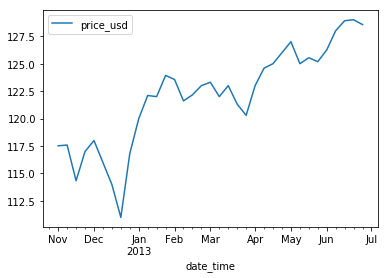

In [52]:
weekly[['price_usd']].plot()

Summer time is the popular time for traveling, which yields the increasing hotel price.

<h3> Split data into training, validation and test set

In [22]:
training_size_large = int(len(all_data) * 0.8)
validation_size = int(training_size_large * 0.2)
training_size = training_size_large - validation_size
test_size = int(len(all_data) * 0.2)

In [23]:
print('training size: %d'%training_size)
print('validation size: %d'%validation_size)
print('test size: %d'%test_size)

training size: 10585702
validation size: 2646425
test size: 3308031


In [27]:
# Approach1: split data manually
training_data = all_data[0: training_size]
validation_data = all_data[training_size:(training_size + validation_size)]
test_data = all_data[(training_size + validation_size): (training_size + validation_size + test_size)]

<h4> check dataset feats:

In [29]:
all_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16540159 entries, 0 to 16540158
Data columns (total 50 columns):
srch_id                        int64
date_time                      datetime64[ns]
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       int64
srch_query_

<h3> Chi-2 test correlation of categorical feats:

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
    
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
    
    
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

Since the size of training set is still too large, I select the first 50000 records as training samples to test chi-square scores of categorical features and "price_usd":

In [34]:
# sampling training data
trainning_data_small = training_data[:50000]

In [35]:
#Initialize ChiSquare Class
cT = ChiSquare(trainning_data_small)

# Feature Selection
testColumns = ['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'srch_destination_id']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="price_usd" )  

srch_id is IMPORTANT for Prediction
site_id is IMPORTANT for Prediction
visitor_location_country_id is IMPORTANT for Prediction
prop_country_id is IMPORTANT for Prediction
prop_id is IMPORTANT for Prediction
srch_destination_id is IMPORTANT for Prediction


<h4> Interpretation: </h4>

The results show that all categorical variables are important for prediction based on Chi-squared test. We should incorporate these categorical features into our final prediction model. 